# Lasso and Slope estimators

Neste projeto iremos implementar métodos iterativos para achar a solução do seguinte estimador de mínimos quadrados regularizado:

$$
\min_{b\in\mathbb{R}^{p\times1}}f(b)=\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b)^2+\lambda\Vert b\Vert_\sharp, 
$$

onde $(y_1,x_1), \ldots, (y_n,x_n)$ é uma amostra de labels/features em $\mathbb{R}\times\mathbb{R}^p$. Àcima, $\lambda>0$ é um hyper-parâmetro positivo e 

$$
\Vert b\Vert_\sharp := \sum_{j=1}^p\omega[j]b_\sharp[j],
$$

é a *norma Slope* do vetor $b$, onde $\omega\in\mathbb{R}^{p\times1}$ é um vetor de coordenadas positivas não-decrescente e $b_\sharp[1]\ge\ldots,b_\sharp[p]$ simboliza as coordenadas de $b$ postas em ordem não-crescente.  Precisamente, iremos considerar duas opcões:

1. $\omega[j]\equiv1$, 
2. $\omega[j]:=\sqrt{\log(2p/j)}$.

<div hidden>
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\argmin}{argmin}$
</div>

# Soft-Thresholding e `sortedL1Prox()`

Recorde que o passo de iteração do método gradiente proximal é calcular o *operador proximal* da norma $\lambda\|\cdot\|_\sharp$:

$$
P(v,\lambda\omega)\in\arg\min_{b\in\mathbb{R}^{p\times1}}\left\{
\frac{1}{2}\|v - b\|_2^2 + \lambda\|b\|_\sharp
\right\}.
$$

1. Suponha primeiro que $\omega[j]\equiv 1$ então $P(v,\lambda\omega)$ tem fórmula explícita. Dados $\gamma\in\mathbb{R}$, defina

$$
S(\gamma,\lambda) := \operatorname{sign}(\gamma)\cdot\max\{|\gamma|-\lambda,0\}.
$$

Acima, $\operatorname{sign}(\gamma)$ é o sinal de $\gamma$. Então, para um vetor $v\in\mathbb{R}^{p\times1}$,

$$
P(v,\lambda\omega)=\big[S(v[1],\lambda),\,\ldots,\,S(v[p],\lambda)\big]^\top.
$$

2. No caso do item 2, não existe uma fórmula explícita para $P(v,\lambda\omega)$. Mas podemos usar a função ``sortedL1Prox()`` do pacote ``SLOPE`` escrito em R. Veja [SLOPE](https://cran.r-project.org/web/packages/SLOPE/index.html), assim como introduções em [An intro to SLOPE](https://cran.r-project.org/web/packages/SLOPE/vignettes/introduction.html) e [Proximal Operators](https://cran.r-project.org/web/packages/SLOPE/vignettes/prox-algs.html). Em nossa notação, ``sortedL1Prox(v,lambda*omega)`` computa $P(v,\lambda\omega)$ para a sequência $\omega$.

Antes precisaremos criar um código para boter ler a função `sortedL1Prox()` em Python. Para tanto, precisaremos da biblioteca `rpy2`. Para instalá-lo chame `pip install rpy2` no terminal base de sua maquina. Em R, o pacote ``SLOPE`` precisa estar instalado e fazer o chamado ``library(SLOPE)``.

In [1316]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from rpy2 import robjects
from rpy2.robjects import conversion, default_converter

In [1317]:
def sortedL1Prox(v,seq):
    '''
    Função que toma (v,seq) e retorna P(v,seq).
    '''
    with conversion.localconverter(default_converter):
        # R representation in Python of (v,seq):
        r_var = robjects.vectors.FloatVector(np.hstack((v,seq)))
        # Python function to call R function sortedL1Prox()
        func = robjects.r(
            '''
            library(SLOPE)
            function(v,seq) sortedL1Prox(v,seq)
            '''
        )
        # Calling Python function sortedL1Prox using R representation r_var:
        return np.asarray(func(r_var[0:len(r_var)//2], r_var[len(r_var)//2:]))

In [1318]:
#Exemplo:
v = 90.0*np.arange(10)
omega = np.ones(10)
lambd = 2.5
seq = lambd*omega
v.shape, omega.shape

((10,), (10,))

In [1319]:
sortedL1Prox(v,seq)

array([  0. ,  87.5, 177.5, 267.5, 357.5, 447.5, 537.5, 627.5, 717.5,
       807.5])

# Exercício 1: Gerando dados

1. Construa uma função ``data_genP(p,s,b_mag)`` que toma $p$, $s\in[p]$ e número positivo ``b_mag`` e retorna vetor $p$-dimensional cujas $s$-ézimas primeiras coordenadas são $b_{\text{mag}}$ e as outras são zero.

In [1320]:
def data_genP(p,s,b_mag):
    arr = np.zeros(p)
    arr[:s] = b_mag
    arr = arr.reshape(-1,1)
    
    return arr

In [1321]:
#Exemplo:
p=100
s=10
b_mag=2
b_true = data_genP(p,s,b_mag)
b_true

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

2. Construa uma função ``data_genXe(n,p,b_true,sd)`` que toma $n$, $p$, $b_{\text{true}}$ e um número positivo ``sd`` e constrói uma matriz de dados ``X`` $n\times p$ cujas linhas são vetores $x_i^\top$ normais padrão $p$-dimensionais independentes e o vetor ``y`` de dimensão $n$ cujas coordenadas satisfazem

$$
y_i = x_i^\top b_{\text{true}} + \text{sd}\cdot\epsilon_i,
$$
onde $\{\epsilon_i\}_{i=1}^n$ é uma sequência iid de normais padrão. 

In [1322]:
def data_genXe(n,p,b_true,sd):
    X = np.random.normal(0, 1, size=(n, p))
    epsilons = np.random.normal(0, 1, size = (n, 1))
    y = X @ b_true + sd * epsilons
    return X,y

In [1323]:
#Exemplo:
sd = 0.1
n = 5
b_true = data_genP(p,s,b_mag)
X,y = data_genXe(n,p,b_true,sd)
X, y

(array([[-2.82556034e-03, -1.38388615e+00,  1.39333188e-01,
         -5.65265539e-01, -1.08578188e-01, -9.52663911e-01,
         -1.86105483e-01, -1.05685935e+00,  1.15523070e+00,
          6.45910473e-01,  3.78141057e-01, -1.06774941e+00,
         -1.42322020e+00, -1.76243267e+00,  4.87830418e-01,
         -5.36094776e-01, -7.26289559e-01, -2.45902602e-01,
          1.67911849e-01, -1.42212934e+00, -1.34161421e-01,
         -3.18456403e-01, -1.50078005e+00, -7.08169608e-01,
         -1.16228545e-01, -6.09575874e-01,  6.40668837e-01,
          8.03463245e-01, -1.48526185e+00,  1.13236863e+00,
         -2.71550256e-01, -6.92867808e-01,  1.11470908e+00,
         -1.23379405e+00, -5.79976210e-01, -1.38292949e+00,
          3.51885164e-02, -4.76654699e-01, -4.44059025e-01,
          8.62519632e-01,  1.03857038e-01, -1.38670161e+00,
          5.44834505e-01, -7.39478133e-01,  1.56914324e-01,
         -2.32730338e-01, -4.69303896e-01, -6.27519049e-01,
         -2.15059960e-01, -5.14065045e-0

# Exercício 2: 

Vamos usar o método gradiente proximal para resolver o problema àcima:

\begin{align*}
w_{k+1} &:= b_k - \frac{1}{L}\nabla f(b_k),\\
b_{k+1} &:= P\left(w_{k+1},\frac{\lambda}{L}\omega\right).
\end{align*}

Construa uma função ``linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final)`` onde, $1/L$ é o passo, ``lambd`` ($=\lambda$) é o fator de penalização, ``b0`` é o ponto inicial, a variável ``t_final`` é o número de iterações e:

1. a variável Booleana ``SlopeB`` vale ``False`` se a sequêndia $\omega[j]\equiv1$.
2. a variável Booleana ``SlopeB`` vale ``True`` se $\omega[j]=\sqrt{\log(2p/j)}$. 

A função deve retornar a sequência $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ e o último iterado $b_{t_{\text{final}}}$ Use penalização

$$
\lambda = \text{sd}\sqrt{\frac{\log p}{n}}, 
$$

e passo $1/L$ com

$$
L = A\lambda_{\max}\left(\frac{X^\top X}{n}\right),
$$ 
para algum ajuste fino $A>0$. 

In [1324]:
def linear_reg(n, p, SlopeB, X, y, L, lambd, b0, t_final):
    if SlopeB:
        omega = np.array([np.sqrt(np.log(2*p/(j+1))) for j in range(p)]).reshape(-1, 1)
    else:
        omega = np.ones(p).reshape(-1, 1)
    b = b0.copy()
    error_inicial = ((np.linalg.norm(y)**2 - 2*np.transpose(y)@X@b + np.linalg.norm(X@b)**2) / (2*n)).item()
    error_sequence = [error_inicial]
    for _ in range(t_final):
        grad = -(1/n) * X.T @ (y - X @ b)
        w = b - (1/L) * grad
        lambd_seq = (lambd / L * omega)
        b = sortedL1Prox(w.flatten(), lambd_seq.flatten()).reshape(-1, 1)
        error = ((np.linalg.norm(y)**2 - 2*np.transpose(y)@X@b + np.linalg.norm(X@b)**2) / (2*n)).item()
        error_sequence.append(error)


    return error_sequence, b

In [1325]:
#Exemplo:
n = 5
p=100
SlopeB = False
X,y = data_genXe(n,p,b_true,sd)
A = 4
L = A*np.max(la.eigvalsh(X.T @ X / X.shape[0]))
b0 = np.zeros(p).reshape(-1, 1)
sd = 0.1
lambd = sd*np.sqrt(np.log(p)/n)    
t_final = 100

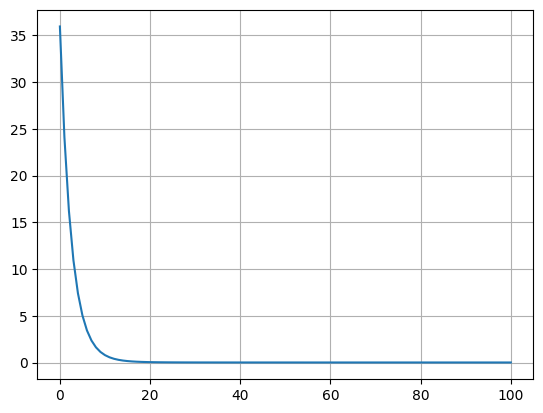

In [1326]:
f1 = linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final)
plt.plot(f1[0])
plt.grid()
plt.show()

# Pergunta: 

Varie $A$. O que acontece se $A$ for muito pequeno? Alguma intuição?

### Resposta: Se A for muito pequeno, para uma matriz $X$ fixa, o valor de $L = A\lambda_{\max}\left(\frac{X^\top X}{n}\right)$ também seria muito pequeno. Ou seja, o passo de "aprendizagem" $1/L$ seria muito grande e o vetor $(\lambda/L)\omega$ possuiria coordenadas muito grandes (tendendo a $\infty$), comprometendo a atualização do vetor $b_k$ e fazendo o valor da função de erro $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ tender ao infinito. Se A for muito grande ocorre o oposto, ou seja, o passo de "aprendizagem" é muito pequeno e o erro demora muito para diminuir (necessitamos de mais iterações).

# Exercício 3: 

Agora, vamos usar o método gradiente proximal acelerado: iniciando de `b0=z0` e $t_0=1$:

\begin{align*}
z_{k+1}&:= P\left(
b_k - (1/L)\nabla f(b_k), \frac{\lambda}{L}\omega
\right),\\
t_{k+1} &:= \frac{1+\sqrt{1+4t_k^2}}{2},\\
b_{k+1} &:= z_{k+1} + \frac{t_{k}-1}{t_{k+1}}(z_{k+1} - z_{k}).
\end{align*}

Construa uma função ``linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)`` onde, $1/L$ é o passo, ``lambd`` ($=\lambda$) é o fator de penalização, ``b0`` é o ponto inicial, a variável ``t_final`` é o número de iterações e:

1. a variável Booleana ``SlopeB`` vale ``False`` se a sequêndia $\omega[j]\equiv1$.
2. a variável Booleana ``SlopeB`` vale ``True`` se $\omega[j]=\sqrt{\log(2p/j)}$. 

A função deve retornar a sequência $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ e o último iterado $b_{t_{\text{final}}}$. Use penalização

$$
\lambda = \text{sd}\sqrt{\frac{\log p}{n}}.
$$

In [1327]:
def linear_reg_acc(n ,p, SlopeB, X, y, L, lambd, b0, t_final):
    if SlopeB:
        omega = np.array([np.sqrt(np.log(2*p/(j+1))) for j in range(p)]).reshape(-1,1)
    else:
        omega = np.ones(p).reshape(-1, 1)
    b = b0.copy()
    z = b0.copy()
    t = 1
    error_inicial = ((la.norm(y)**2 - 2*np.transpose(y)@X@b + la.norm(X@b)**2) / (2*n)).item()
    error_sequence = [error_inicial]
    for _ in range(t_final):
        t_anterior = t
        z_anterior = z
        grad = -(1/n) * X.T @ (y - X @ b)
        w = b - (1/L) * grad
        lambd_seq = (lambd / L * omega)
        z = sortedL1Prox(w.flatten(), lambd_seq.flatten()).reshape(-1, 1)
        t = (1 + np.sqrt(1 + 4 * t**2)) / 2
        b = z + (t_anterior - 1)/t * (z - z_anterior)
        error =  ((la.norm(y)**2 - 2*np.transpose(y)@X@b + la.norm(X@b)**2) / (2*n)).item()
        error_sequence.append(error)

    return error_sequence, b

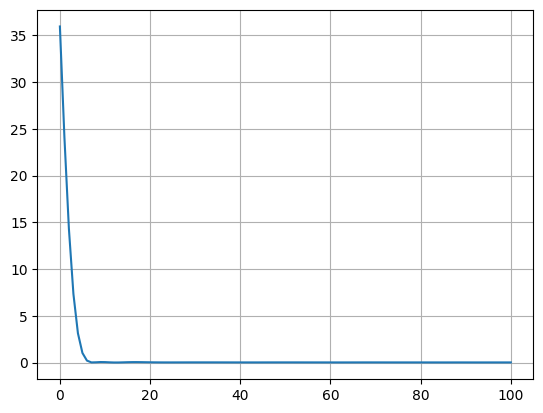

In [1328]:
f2 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)
plt.plot(f2[0])
plt.grid()
plt.show()

# Exercício 4: 

Implemente num mesmo gráfico os erros $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ de cada método em função no número de iterações.

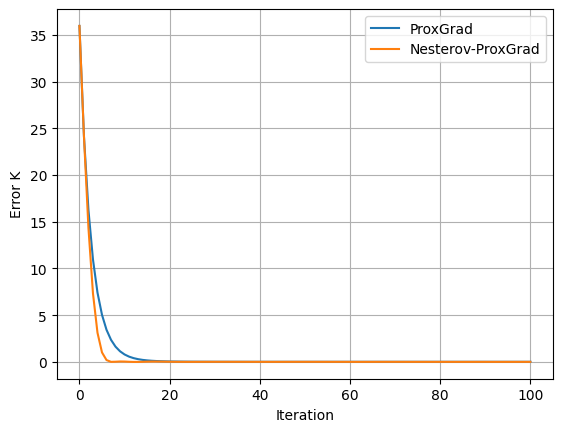

In [1329]:
plt.plot(f1[0], label="ProxGrad")
plt.plot(f2[0], label="Nesterov-ProxGrad")
plt.xlabel("Iteration")
plt.ylabel("Error K")
plt.legend()
plt.grid()
plt.show()

# Exercício 5:

Refaça os exercícios com $sd=1$ e $sd=10$. Há alguma diferença quando $sd=10$? Tem alguma intuição de porque isso acontece?

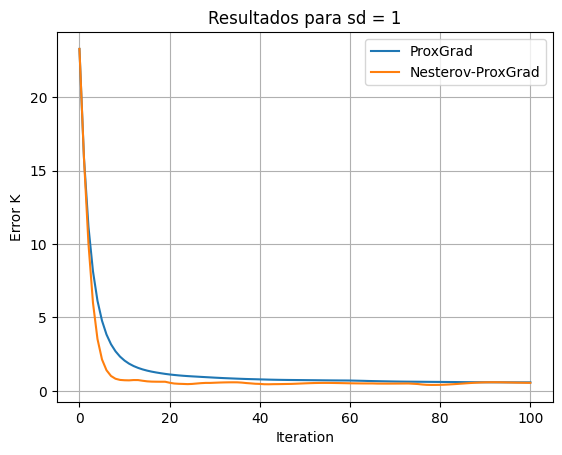

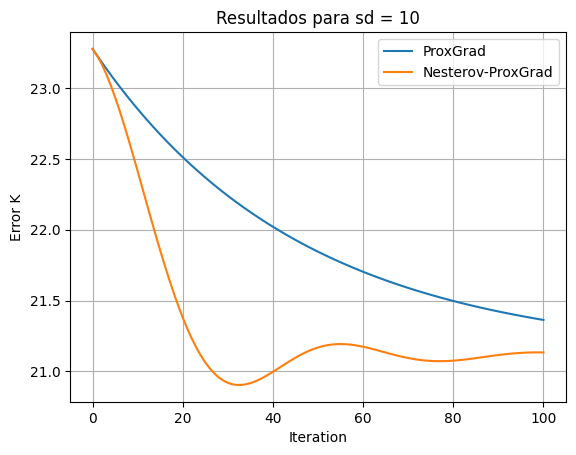

In [1330]:
#Exemplo com sd = 1:
n = 5
p=100
SlopeB = False
X,y = data_genXe(n,p,b_true,sd)
A = 4
L = A*np.max(la.eigvalsh(X.T @ X / X.shape[0]))
b0 = np.zeros(p).reshape(-1, 1)
sd1 = 1
sd2 = 10
lambd1 = sd1*np.sqrt(np.log(p)/n)
lambd2 = sd2*np.sqrt(np.log(p)/n)    
t_final = 100

f1_1 = linear_reg(n,p,SlopeB,X,y,L,lambd1,b0,t_final)
f2_1 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd1,b0,t_final)

f1_2 = linear_reg(n,p,SlopeB,X,y,L,lambd2,b0,t_final)
f2_2 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd2,b0,t_final)


plt.plot(f1_1[0], label="ProxGrad")
plt.plot(f2_1[0], label="Nesterov-ProxGrad")
plt.xlabel("Iteration")
plt.ylabel("Error K")
plt.title("Resultados para sd = 1")
plt.legend()
plt.grid()
plt.show()

plt.plot(f1_2[0], label="ProxGrad")
plt.plot(f2_2[0], label="Nesterov-ProxGrad")
plt.xlabel("Iteration")
plt.ylabel("Error K")
plt.title("Resultados para sd = 10")
plt.legend()
plt.grid()
plt.show()

### Resposta: 